Problem: 모델을 학습해야하는데, 한 번에 학습할 수도 없고, 새로운 모델을 계속해서 만들 수도 없음.

## 점진적인 학습

점진적 학습(온라인 학습): 모델을 새로운 데이터에 대해서만 조금씩 더 훈련하는 방식

**확률적 경사 하강법**  

점진적 학습 알고리즘 중 하나  
랜덤하게 하나의 샘플을 골라 기울기를 계산하여 최적에 접근하는 방식

P: 모든 샘플을 다 사용하여 훈련했음에도(훈련 세트를 한 번 모두 사용, 1에포크) 최적에 도달하지 못한다면?  
S: 모든 샘플에 대해 반복해서 다시 학습 (여러 번의 에포크 수행)

**미니배치 경사 하강법**  

SGD의 단점: 샘플 하나씩 학습하다 보니 최적으로 곧바로 접근하지 못하고 자꾸 튐  
이를 보완하고자 미니배치 사용  

미니배치 경사 하강법: 무작위로 몇 개의 샘플을 선택해서 기울기 계산
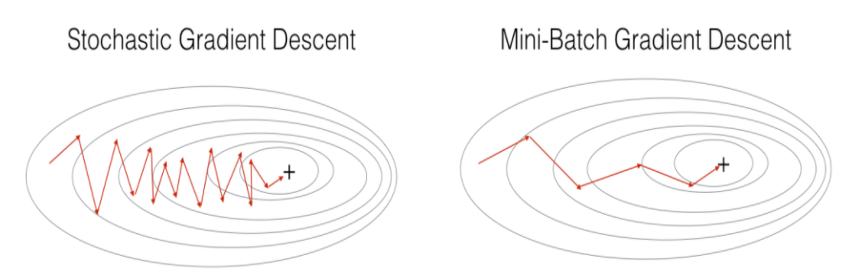

배치 경사 하강법: 전체 데이터를 사용하는 방법 (쉽지 않음)

**손실 함수**  
우리가 원하는 최적에서 얼마나 멀리 떨어져있는지 나타내는 함수  
경사 하강법을 이용할 때 계산하는 기울기가 손실 함수의 기울기.

로지스틱 손실 함수 (이진 크로스엔트로피 손실 함수)
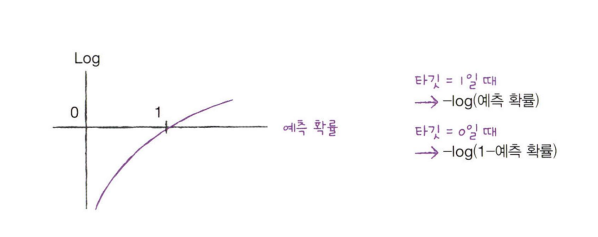

## SGDClassifier

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier

```
def __init__(
        self,
        loss="hinge", # 손실함수, 기본값은 hinge로 SVM을 기본으로 사용
        *,
        penalty="l2",
        alpha=0.0001,
        l1_ratio=0.15,
        fit_intercept=True,
        max_iter=1000, #최대 반복 횟수(에폭)
        tol=1e-3,
        shuffle=True,
        verbose=0,
        epsilon=DEFAULT_EPSILON,
        n_jobs=None,
        random_state=None,
        learning_rate="optimal",
        eta0=0.0,
        power_t=0.5,
        early_stopping=False, #이것을 True로 하면 에폭을 다 돌지 않을 수 있음
        validation_fraction=0.1,
        n_iter_no_change=5,
        class_weight=None,
        warm_start=False,
        average=False,
    ):
```
loss='log_loss', max_iter=10로 지정

In [6]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


c:\Users\kjsid\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [7]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합

에폭 횟수에 대해 과대 과소적합을 판단하기 위해 에폭 횟수별 train과 test set에 대한 accuracy를 시각화

In [8]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [9]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

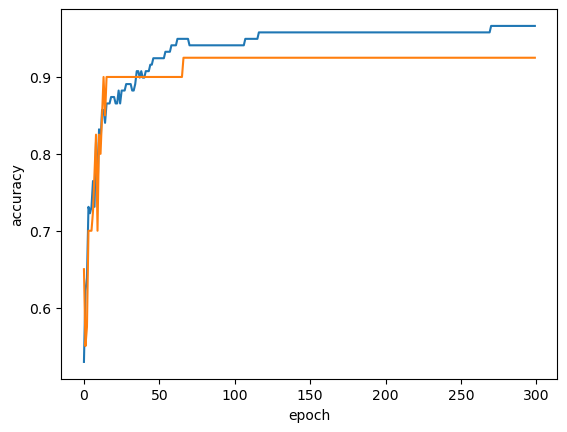

In [10]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

100 이전에는 accuracy가 낮고, 100이후에는 train과 test의 차이가 점점 벌어지는 것을 확인 -> 100이 적당

In [11]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [12]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
